In [1]:
import pandas as pd

In [18]:
df=pd.read_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Humana_Mays_24\Data\Training_final\Training_final\final_train.csv")

In [3]:
null_cols = df.isnull().sum().reset_index()

In [6]:
list(null_cols.loc[null_cols[0]>(0.1*df.shape[0])]['index'])

['rwjf_homicides_rate',
 'rwjf_infant_mortality',
 'rwjf_drug_overdose_deaths_rate',
 'rwjf_disconnect_youth_pct',
 '2021_annual_wellness',
 '2021_clm_unique_key',
 '2021_podiatrist_visit',
 '2021_pcp_visit',
 '2021_fqhc_visit',
 '2021_cardiologist_visit',
 '2021_telehealth',
 '2021_urgent_care_visit',
 '2021_gastroenterologist_visit',
 '2021_oncolologist_visit',
 '2021_pulmonologist_visit',
 '2021_preventative_visit',
 '2021_nephroloogist_visit',
 '2021_orthopedist_visit',
 '2021_ophthalmologist_visit',
 '2021_humana_paf',
 '2021_optometrist_visit',
 '2021_endocrinologist_visit',
 '2021_radiologist_visit',
 '2021_physical_therapist_visit',
 '2021_comp_physical_exam',
 '2021_er_visit',
 '2021_obgyn_visit',
 '2022_annual_wellness',
 '2022_clm_unique_key',
 '2022_podiatrist_visit',
 '2022_pcp_visit',
 '2022_fqhc_visit',
 '2022_cardiologist_visit',
 '2022_telehealth',
 '2022_urgent_care_visit',
 '2022_gastroenterologist_visit',
 '2022_oncolologist_visit',
 '2022_pulmonologist_visit',
 '20

In [3]:
df.fillna(0, inplace=True)

In [3]:
from sklearn.linear_model import LogisticRegression


In [19]:
from sklearn.model_selection import train_test_split

In [18]:
df.columns

Index(['Unnamed: 0', 'id', 'preventive_visit_gap_ind', 'cms_frailty_ind',
       'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt',
       'atlas_recfacpth14', 'atlas_ffrpth14', 'atlas_fsrpth14',
       'atlas_grocpth14',
       ...
       'TFP_elig_cnt', 'TRC_(MRP)_elig_cnt', 'TRC_(PED)_elig_cnt',
       'HEDIS_comp_cnt', 'Patient_Experience_comp_cnt',
       'Patient_Safety_comp_cnt', 'HEDIS_elig_cnt',
       'Patient_Experience_elig_cnt', 'Patient_Safety_elig_cnt',
       'rucc_category'],
      dtype='object', length=379)

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('preventive_visit_gap_ind'),df['preventive_visit_gap_ind'],test_size=0.3)

KeyError: "['preventive_visit_gap_ind'] not found in axis"

In [27]:
lr=LogisticRegression(penalty='l1',max_iter=10, n_jobs=-1, solver='saga')
lr.fit(df.drop(['preventive_visit_gap_ind','Unnamed: 0'], axis=1),df['preventive_visit_gap_ind'])

C:\Users\shanm\anaconda3\envs\spark\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=10, n_jobs=-1, penalty='l1', solver='saga')

In [41]:
lr.coef_[0]

array([ 6.26115236e-10,  1.71607198e-10,  1.17256001e-07,  1.36918941e-07,
        0.00000000e+00, -5.98482205e-10, -1.30247077e-10,  7.79884254e-12,
        1.32683773e-08, -1.44611940e-08, -3.97206031e-08, -1.17115991e-08,
       -1.64386705e-08, -1.67520285e-08, -1.46660338e-08, -1.63176720e-08,
       -1.62545758e-08, -1.35694736e-08, -1.56592497e-08, -2.07129977e-08,
       -1.57754126e-08, -1.68474043e-08, -9.87484691e-09, -1.14702922e-08,
       -6.75269795e-09, -6.22960875e-09, -7.56126685e-09,  9.45601289e-10,
       -7.39569622e-09, -7.07808299e-09, -7.45489706e-09, -7.62183086e-09,
       -6.95661430e-09, -6.82314685e-09, -6.81377840e-09, -5.94252368e-09,
       -1.02384714e-08, -1.39560262e-08, -1.28137428e-08, -1.03049115e-08,
       -9.74265210e-09, -9.97778642e-09, -1.24269535e-08, -1.36303391e-08,
       -1.02955214e-08, -1.08152781e-08, -8.80314994e-09, -1.16290396e-08,
       -3.87918596e-08, -3.91836309e-08, -3.54483613e-08, -3.77093128e-08,
       -3.29009487e-08, -

In [43]:
ypred=lr.predict(df.drop(['preventive_visit_gap_ind','Unnamed: 0'], axis=1))

In [4]:
from sklearn.metrics import *

In [47]:
confusion_matrix(ypred,df['preventive_visit_gap_ind'])

array([[840494, 686525],
       [   350,    535]], dtype=int64)

In [39]:
feat_imp=pd.DataFrame((df.drop(['preventive_visit_gap_ind','Unnamed: 0'], axis=1).columns,[x for x in lr.coef_[0]])).T.sort_values(by=1, ascending=False)

In [40]:
feat_imp

,0,1
129,rx_days_since_last_script,0.000005
133,rwjf_premature_death_rate,0.000004
102,days_since_last_clm,0.000004
210,days_since_last_login,0.000002
85,nonpar_ds_clm,0.000001
...,...,...
96,total_net_paid_pmpm_cost,-0.000001
95,total_allowed_pmpm_cost,-0.000001
117,rx_overall_net_paid_pmpm_cost,-0.000003
116,rx_overall_pmpm_cost,-0.000003


In [5]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz, plot_tree

In [9]:
dtc=DecisionTreeClassifier(max_depth=6)
dtc.fit(df.drop(['preventive_visit_gap_ind','Unnamed: 0','id'], axis=1), df['preventive_visit_gap_ind'])

DecisionTreeClassifier(max_depth=6)

In [11]:
y_pred=dtc.predict(df.drop(['preventive_visit_gap_ind','Unnamed: 0','id'], axis=1))

In [21]:
export_graphviz(dtc, out_file='dtc.png')

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
feature_cols=df.drop(['preventive_visit_gap_ind','Unnamed: 0','id'], axis=1).columns
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('my_decision_tree.png')

ModuleNotFoundError: No module named 'sklearn.externals.six'

[Text(0.5, 0.9285714285714286, 'x[95] <= 27.5\ngini = 0.495\nsamples = 1527904\nvalue = [840844, 687060]'),
 Text(0.25, 0.7857142857142857, 'x[128] <= 85.5\ngini = 0.398\nsamples = 199391\nvalue = [54666, 144725]'),
 Text(0.125, 0.6428571428571429, 'x[232] <= 0.5\ngini = 0.477\nsamples = 97488\nvalue = [38397, 59091]'),
 Text(0.0625, 0.5, 'x[229] <= 0.5\ngini = 0.489\nsamples = 83965\nvalue = [35885, 48080]'),
 Text(0.03125, 0.35714285714285715, 'x[300] <= 0.5\ngini = 0.5\nsamples = 42618\nvalue = [21132, 21486]'),
 Text(0.015625, 0.21428571428571427, 'x[224] <= 7.5\ngini = 0.498\nsamples = 31522\nvalue = [14788, 16734]'),
 Text(0.0078125, 0.07142857142857142, 'gini = 0.489\nsamples = 3866\nvalue = [2223, 1643]'),
 Text(0.0234375, 0.07142857142857142, 'gini = 0.496\nsamples = 27656\nvalue = [12565, 15091]'),
 Text(0.046875, 0.21428571428571427, 'x[199] <= 5.5\ngini = 0.49\nsamples = 11096\nvalue = [6344, 4752]'),
 Text(0.0390625, 0.07142857142857142, 'gini = 0.453\nsamples = 2871\nvalu

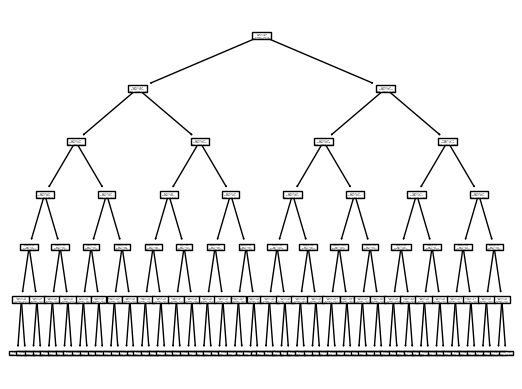

In [23]:
plot_tree(dtc)

In [29]:
feature_cols=df.drop(['preventive_visit_gap_ind','Unnamed: 0','id'], axis=1).columns

In [60]:
feature_cols[232]

'veteran_ind'

In [30]:
feat_imp=pd.DataFrame({'cols':feature_cols,'value':dtc.feature_importances_})

In [6]:
import numpy as np

In [45]:
np.sum(feat_imp['value'])

1.0

In [43]:
feat_imp['percentage']=(feat_imp['value']/)*100

In [44]:
feat_imp.sort_values(by='value',ascending=False)

,cols,value,percentage
95,total_net_paid_pmpm_cost,0.402730,40.273036
229,generic_grouper,0.201173,20.117338
128,rx_days_since_last_script,0.117661,11.766081
111,riskarr_downside,0.048885,4.888511
232,veteran_ind,0.041660,4.166049
...,...,...,...
125,rx_tier_2_pmpm_ct,0.000000,0.000000
124,rx_tier_1_pmpm_ct,0.000000,0.000000
123,rx_overall_pmpm_ct,0.000000,0.000000
122,rx_overall_dist_gpi6_pmpm_ct,0.000000,0.000000


In [7]:
from sklearn.metrics import *

In [49]:
roc_curve(y_pred,df['preventive_visit_gap_ind'])

(array([0.        , 0.35964079, 1.        ]),
 array([0.        , 0.63551134, 1.        ]),
 array([inf,  1.,  0.]))

In [50]:
confusion_matrix(y_pred,df['preventive_visit_gap_ind'])

array([[659091, 370161],
       [181753, 316899]], dtype=int64)

In [52]:
print(classification_report(y_pred,df['preventive_visit_gap_ind']))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70   1029252
           1       0.46      0.64      0.53    498652

    accuracy                           0.64   1527904
   macro avg       0.62      0.64      0.62   1527904
weighted avg       0.68      0.64      0.65   1527904



In [54]:
roc_auc_score(y_pred,df['preventive_visit_gap_ind'])

0.6379352754449811

In [57]:
df.groupby('preventive_visit_gap_ind')['total_net_paid_pmpm_cost'].describe()

,count,mean,std,min,25%,50%,75%,max
preventive_visit_gap_ind,,,,,,,,
0,840844.0,584.218637,1373.165364,0.0,89.0,200.0,501.0,259272.0
1,687060.0,569.759634,1471.314565,0.0,39.0,140.0,443.0,182149.0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shanm\AppData\Local\Temp\ipykernel_11196\3613554044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['preventive_visit_gap_ind']==0]['total_net_paid_pmpm_cost'], hist=True, kde=True,


(0.0, 20000.0)

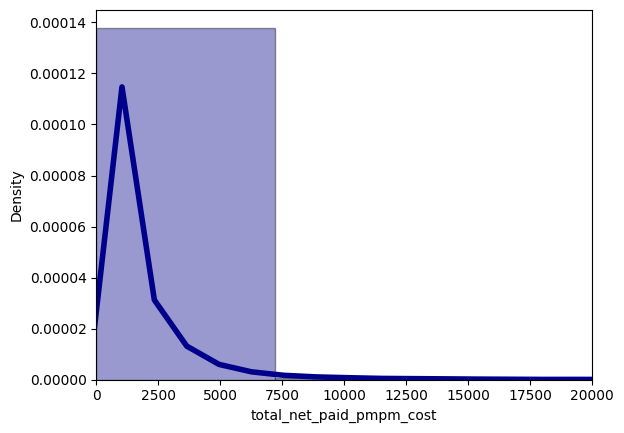

In [77]:
sns.distplot(df[df['preventive_visit_gap_ind']==0]['total_net_paid_pmpm_cost'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(0, 20000)  # Show up to the 95th percentile for clarity


C:\Users\shanm\AppData\Local\Temp\ipykernel_11196\2062746203.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['preventive_visit_gap_ind']==1]['total_net_paid_pmpm_cost'], hist=True, kde=True,


(0.0, 20000.0)

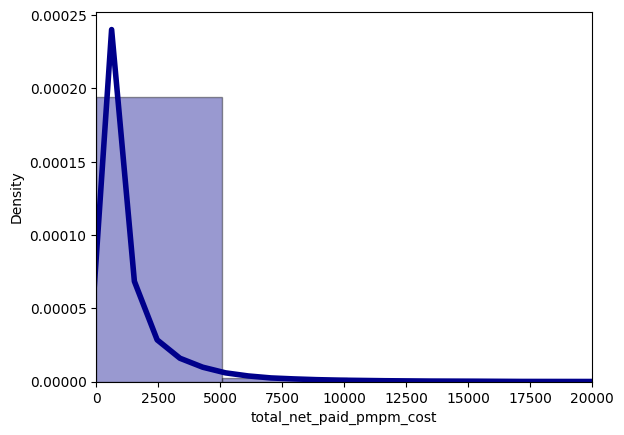

In [78]:
sns.distplot(df[df['preventive_visit_gap_ind']==1]['total_net_paid_pmpm_cost'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(0, 20000)  # Show up to the 95th percentile for clarity


In [82]:
df[df['total_net_paid_pmpm_cost']<27.5]['preventive_visit_gap_ind'].value_counts()

preventive_visit_gap_ind
1    144725
0     54666
Name: count, dtype: int64

In [83]:
(54666/(54666+144725))*100

27.416483191317564

In [81]:
df[df['total_net_paid_pmpm_cost']>=27.5]['preventive_visit_gap_ind'].value_counts()

preventive_visit_gap_ind
0    786178
1    542335
Name: count, dtype: int64

In [84]:
542335/(542335+786178)

0.4082270929979609

In [9]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

In [20]:
feature_cols=df.drop(['preventive_visit_gap_ind','Unnamed: 0','id'], axis=1).columns

In [10]:
hgbc=HistGradientBoostingClassifier(max_iter=1000,max_depth=6 , l2_regularization=0.3)
hgbc.fit(df[feature_cols], df['preventive_visit_gap_ind'])

HistGradientBoostingClassifier(l2_regularization=0.3, max_depth=6,
                               max_iter=1000)

In [13]:
y_preds=hgbc.predict(df[feature_cols])

In [14]:
confusion_matrix(y_preds,df['preventive_visit_gap_ind'])

array([[690659, 291656],
       [150185, 395404]], dtype=int64)

In [16]:
print(classification_report(y_preds,df['preventive_visit_gap_ind']))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76    982315
           1       0.58      0.72      0.64    545589

    accuracy                           0.71   1527904
   macro avg       0.70      0.71      0.70   1527904
weighted avg       0.73      0.71      0.72   1527904



In [18]:
feat_colum = pd.DataFrame({'columns': feature_cols, 'value': hgbc.feature_importances_})


AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

In [24]:
del hgbc

In [20]:
from sklearn.inspection import permutation_importance

In [23]:
import xgboost as xgb

In [2]:
from xgboost import XGBClassifier

In [29]:
xgbc=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01, max_depth=7,colsample_bytree=0.8,reg_lambda=500,reg_alpha=0.6, objective='binary:logistic')
xgbc.fit(df[feature_cols], df['preventive_visit_gap_ind'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
y_preds=xgbc.predict(df[feature_cols])

In [31]:
confusion_matrix(y_preds,df['preventive_visit_gap_ind'])

array([[694138, 330701],
       [146706, 356359]], dtype=int64)

In [32]:
print(classification_report(y_preds,df['preventive_visit_gap_ind']))

              precision    recall  f1-score   support

           0       0.83      0.68      0.74   1024839
           1       0.52      0.71      0.60    503065

    accuracy                           0.69   1527904
   macro avg       0.67      0.69      0.67   1527904
weighted avg       0.72      0.69      0.70   1527904



In [33]:
roc_auc_score(y_preds,df['preventive_visit_gap_ind'])

0.692844924993561

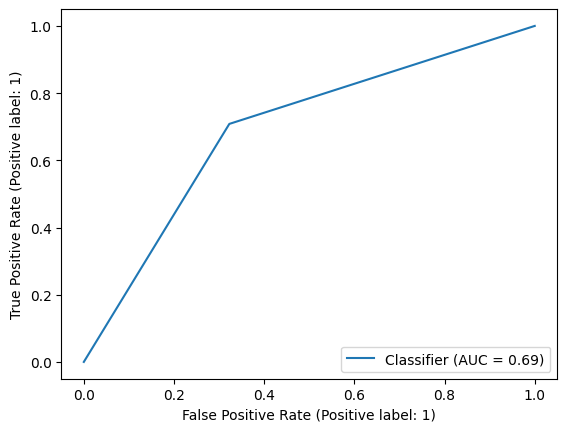

In [34]:
RocCurveDisplay.from_predictions(y_preds,df['preventive_visit_gap_ind'])

In [36]:
feat_colum = pd.DataFrame({'columns': feature_cols, 'value': xgbc.feature_importances_})

In [38]:
feat_colum[feat_colum['value']>0].sort_values(by='value',ascending=False)

,columns,value
229,generic_grouper,0.076573
95,total_net_paid_pmpm_cost,0.075766
128,rx_days_since_last_script,0.052634
94,total_allowed_pmpm_cost,0.050305
74,cnt_cp_webstatement_pmpm_ct,0.042548
...,...,...
343,COA_(MDR)_elig_cnt,0.000038
297,ART_comp_cnt,0.000036
306,COA_(PNS)_comp_cnt,0.000022
344,COA_(PNS)_elig_cnt,0.000019


In [39]:
df.groupby('generic_grouper')['preventive_visit_gap_ind'].value_counts()

generic_grouper  preventive_visit_gap_ind
0.0              0                           567055
                 1                           333751
1.0              1                           353224
                 0                           273711
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols], df['preventive_visit_gap_ind'], test_size=0.3)

In [23]:
pd.concat([X_train,y_train], axis=1).to_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Humana_Mays_24\Data\Training_final\Training_final\final_train_trian.csv")

In [53]:
pd.concat([X_test,y_test],axis=1).to_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Humana_Mays_24\Data\Training_final\Training_final\final_train_test.csv")

In [3]:
train_df=pd.read_csv(r"C:\Users\shanm\OneDrive\Desktop\Kavya\Humana_Mays_24\Data\Training_final\Training_final\final_train_trian.csv")

In [5]:
train_df.columns

Index(['Unnamed: 0', 'cms_frailty_ind', 'cms_tot_ma_payment_amt',
       'cms_tot_partd_payment_amt', 'atlas_recfacpth14', 'atlas_ffrpth14',
       'atlas_fsrpth14', 'atlas_grocpth14', 'atlas_povertyallagespct',
       'cci_score',
       ...
       'TRC_(MRP)_elig_cnt', 'TRC_(PED)_elig_cnt', 'HEDIS_comp_cnt',
       'Patient_Experience_comp_cnt', 'Patient_Safety_comp_cnt',
       'HEDIS_elig_cnt', 'Patient_Experience_elig_cnt',
       'Patient_Safety_elig_cnt', 'rucc_category', 'preventive_visit_gap_ind'],
      dtype='object', length=378)

In [12]:
feature_cols=train_df.drop(['Unnamed: 0','preventive_visit_gap_ind'], axis=1).columns

In [6]:
train_df['preventive_visit_gap_ind']

0          1
1          0
2          0
3          1
4          0
          ..
1069527    0
1069528    1
1069529    0
1069530    1
1069531    0
Name: preventive_visit_gap_ind, Length: 1069532, dtype: int64

In [7]:
param_grid={'n_estimators':[750, 1000,1250,1500],
              'max_depth':[ 6, 7, 8, 9],
              'learning_rate':[0.1,  0.01, 0.001, 0.005],
              'reg_lambda':[ 10, 100,500, 1000, 2000], 
              'reg_alpha':[0, 0.25,0.5,0.75, 1, 1.5] ,
              'colsample_bytree':[0.5,0.6, 0.7,0.8,0.9],
              'min_child_weight':[5,50,100,200,250]
           }

In [8]:
xgbc=XGBClassifier(objective='binary:logistic')

In [13]:
clf=RandomizedSearchCV(xgbc, 
                   param_grid,  n_iter=100, scoring='roc_auc',
                   n_jobs=-1, cv=3, verbose=1, random_state=1111)
clf.fit(train_df[feature_cols],train_df['preventive_visit_gap_ind'])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


MemoryError: Unable to allocate 1.92 GiB for an array with shape (362, 713021) and data type float64